# import libraries

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models


# load dataset

In [2]:

dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)

# Get the class names
class_names = info.features['label'].names
print(f"Class Names: {class_names}")


Class Names: ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']


In [4]:
IMG_SIZE = 128
BATCH_SIZE = 32

def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE)) / 255.0  
    return image, label


# train dataset

In [5]:
train_data = dataset['train'].map(format_image).shuffle(1000).batch(BATCH_SIZE).prefetch(1)


# data augmentation

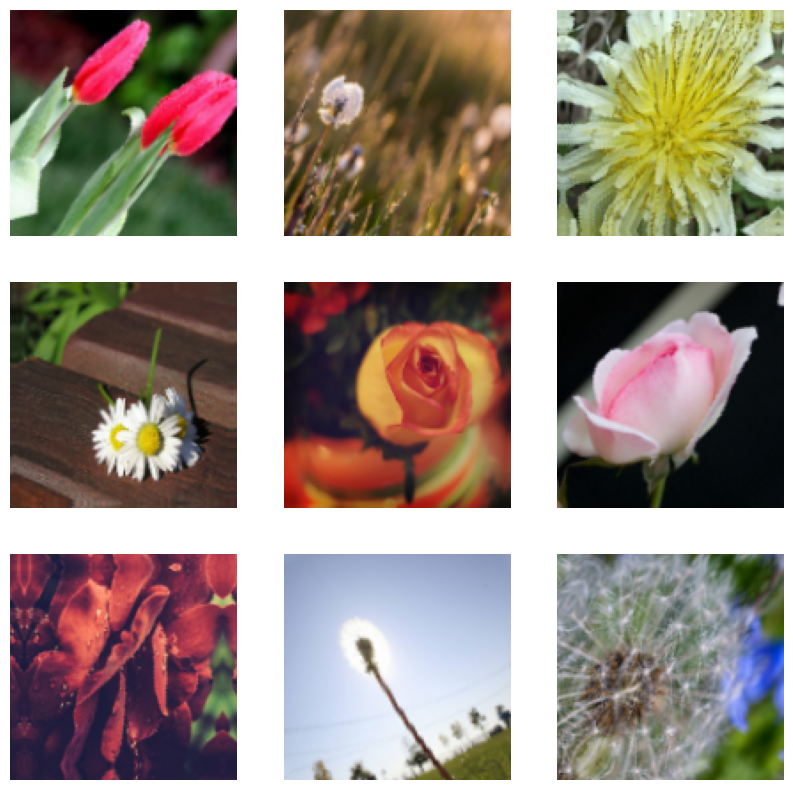

In [6]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

# viewing Data Augmentation
for image, label in train_data.take(1):
    augmented_image = data_augmentation(image)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image[i])
        plt.axis("off")
    plt.show()


# create the model of iris flower recognition

In [8]:
model = models.Sequential([
    data_augmentation,
    
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2, 2),
    
    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    # Third convolutional layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

# model compilation
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 128, 128, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 126, 126, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 63, 63, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 61, 61, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 28, 28, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 14, 14, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (32, 25088)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 128)                   │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (32, 128)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 5)                     │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

# epoch of the model

In [9]:
EPOCHS = 100

history = model.fit(train_data, epochs=EPOCHS)


Epoch 1/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 56s 451ms/step - accuracy: 0.3165 - loss: 1.5249
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 50s 436ms/step - accuracy: 0.4943 - loss: 1.1996
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 50s 433ms/step - accuracy: 0.5502 - loss: 1.0571
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 50s 434ms/step - accuracy: 0.6154 - loss: 0.9990
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 50s 431ms/step - accuracy: 0.6521 - loss: 0.9182
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 50s 436ms/step - accuracy: 0.6632 - loss: 0.9006
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 49s 429ms/step - accuracy: 0.6841 - loss: 0.8548
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 83s 434ms/step - accuracy: 0.6784 - loss: 0.8564
Epoch 9/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 83s 440ms/step - accuracy: 0.6950 - loss: 0.7993
Epoch 10/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 81s 434ms/step - accuracy: 0.7045 - loss: 0.7859
Epoch 11/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 50s 431ms/step - accuracy: 0.6950 - loss: 0.8090
Epoch 12

# accuracy

In [33]:
loss, acc = model.evaluate(train_data)
print(f"Test Accuracy: {acc * 100:.2f}%")

115/115 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - accuracy: 0.9368 - loss: 0.1895
Test Accuracy: 93.49%


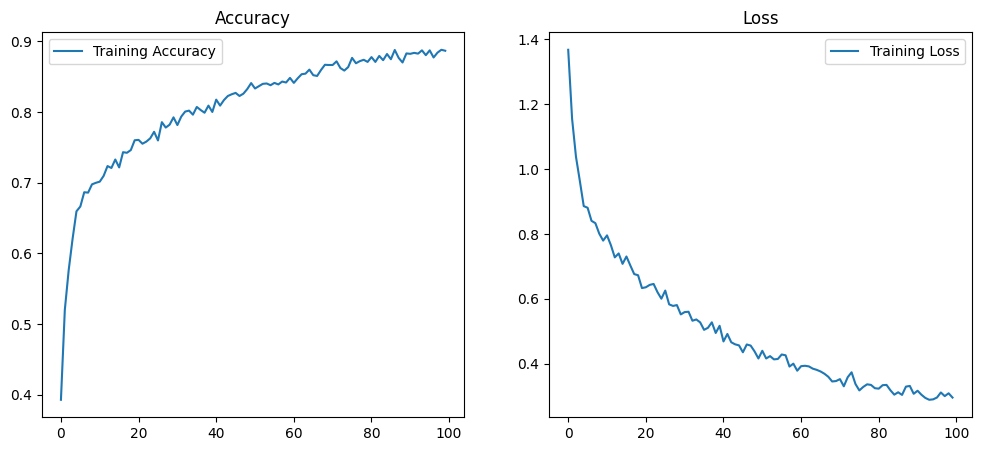

In [34]:
plt.figure(figsize=(12, 5))

# Accuracy of the model
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss of the model
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.legend()
plt.title('Loss')

plt.show()


# predict sample image of flowers

In [30]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_flower(img_path):
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array) 
    predicted_class_index = np.argmax(predictions)
    confidence = predictions[0][predicted_class_index] * 100

    print(f"Predicted Class: {class_names[predicted_class_index]}")
    print(f"Confidence: {confidence:.2f}%")

    #image path
predict_flower("C:/Users/arafa/OneDrive/Desktop/sanchit-folder/ANN/iris/tensorflow_datasets/downloads/tf_flowers/flower_photos/daisy/144076848_57e1d662e3_m.jpg")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Predicted Class: daisy
Confidence: 100.00%


# saving and loading the model

In [35]:
from tensorflow import keras
# Save model
model.save("iris-flower-recognition.keras")
# Load model
model = keras.models.load_model("iris-flower-recognition.keras")

